In [2]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt
from keras.models import Sequential

In [3]:
IMAGE_SIZE=224
BATCH_SIZE=32

In [4]:
# load the dataset using tensorflow

In [5]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "BananaLSD",
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE,
)

Found 1600 files belonging to 4 classes.


In [6]:
#Classes which are Classified

In [7]:
image_folders=dataset.class_names
image_folders

['cordana', 'healthy', 'pestalotiopsis', 'sigatoka']

In [15]:
# After batched the length of the dataset

In [8]:
len(dataset)

50

In [9]:
# batch and its shape and label batch

In [10]:
for image_batch,labels_batch in dataset.take(1):
    print (image_batch.shape)
    print (labels_batch.numpy())

(32, 224, 224, 3)
[3 2 3 0 0 1 0 1 0 2 3 0 0 0 3 0 2 0 0 1 3 3 3 3 0 0 2 3 1 3 3 0]


In [11]:
# visualizing the batch of the dataset

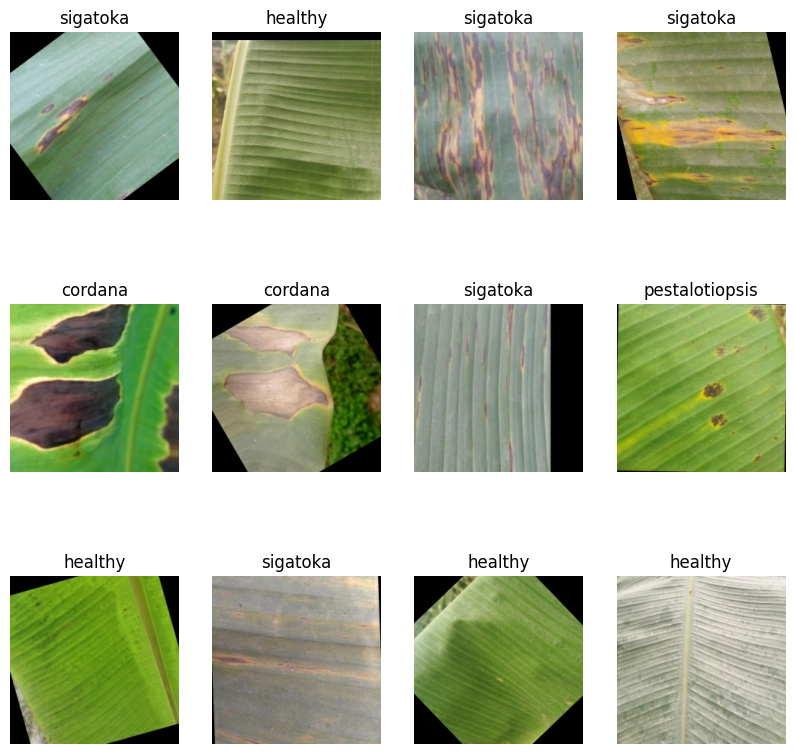

In [12]:
plt.figure(figsize=(10,10))
for image_batch, labels_batch in dataset.take(1):
    for i in range(12):
        ax=plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(image_folders[labels_batch[i]])
        plt.axis("off")

In [13]:
# divide our Data Set into training and Testing 

In [16]:
train_size=0.8
test_size=0.2
val_size=0.1
print(len(dataset)*train_size)
print(len(dataset)*test_size)
print(len(dataset)*val_size)
print(type(train_size))

40.0
10.0
5.0
<class 'float'>


In [17]:
train_ds=dataset.take(40)
test_ds=dataset.skip(40)
val_ds=test_ds.take(5)
test_ds=test_ds.skip(5)

In [18]:
print(len(train_ds))
print(len(test_ds))
print(len(val_ds))
print(type(train_ds))

40
5
5
<class 'tensorflow.python.data.ops.take_op._TakeDataset'>


In [18]:
# Data Augumentation

In [19]:
train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [20]:
for image_batch,labels_batch in dataset.take(1):
    print(image_batch[0].numpy())

[[[194. 171. 153.]
  [194. 171. 153.]
  [194. 171. 153.]
  ...
  [129. 134. 111.]
  [130. 135. 112.]
  [131. 136. 113.]]

 [[193. 168. 148.]
  [191. 169. 148.]
  [194. 169. 149.]
  ...
  [129. 134. 111.]
  [131. 136. 113.]
  [133. 138. 115.]]

 [[182. 156. 133.]
  [182. 158. 134.]
  [183. 157. 134.]
  ...
  [131. 136. 113.]
  [131. 139. 115.]
  [134. 142. 118.]]

 ...

 [[128. 136.  95.]
  [128. 135.  94.]
  [130. 134. 101.]
  ...
  [ 64.  64.   4.]
  [ 68.  67.  10.]
  [ 75.  75.  15.]]

 [[137. 143. 105.]
  [135. 141. 103.]
  [135. 138. 107.]
  ...
  [ 79.  78.  21.]
  [ 78.  79.  22.]
  [ 81.  82.  24.]]

 [[140. 146. 108.]
  [139. 145. 109.]
  [140. 141. 110.]
  ...
  [ 94.  93.  37.]
  [ 89.  90.  33.]
  [ 85.  86.  29.]]]


In [21]:
resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.Rescaling(1./255),
])

In [22]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2),
])

In [23]:
train_ds = train_ds.map(
    lambda x, y: (data_augmentation(x, training=True), y)
).prefetch(buffer_size=tf.data.AUTOTUNE)

In [25]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, 3)
n_classes = 4

model = models.Sequential([
    resize_and_rescale,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])
model.build(input_shape=input_shape)

In [26]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential (Sequential)              │ (32, 224, 224, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (32, 222, 222, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (32, 111, 111, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (32, 109, 109, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (32, 54, 54, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (32, 52, 52, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (32, 26, 26, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (32, 24, 24, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (32, 12, 12, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (32, 10, 10, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (32, 5, 5, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (32, 3, 3, 64)              │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (32, 1, 1, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (32, 64)                    │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (32, 64)                    │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (32, 4)                     │             260 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 171,524 (670.02 KB)

 Trainable params: 171,524 (670.02 KB)

 Non-trainable params: 0 (0.00 B)

In [27]:
model.compile(
    optimizer='adam',
    loss =  tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy'],
)

In [28]:
history=model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=50,
)

Epoch 1/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 53s 1s/step - accuracy: 0.3698 - loss: 1.2787 - val_accuracy: 0.5437 - val_loss: 1.1246
Epoch 2/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 52s 1s/step - accuracy: 0.4929 - loss: 1.0825 - val_accuracy: 0.4875 - val_loss: 1.1275
Epoch 3/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 54s 1s/step - accuracy: 0.5128 - loss: 1.0358 - val_accuracy: 0.4625 - val_loss: 1.2371
Epoch 4/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 58s 1s/step - accuracy: 0.5431 - loss: 1.0053 - val_accuracy: 0.6625 - val_loss: 0.8328
Epoch 5/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 50s 1s/step - accuracy: 0.5895 - loss: 0.8745 - val_accuracy: 0.6938 - val_loss: 0.6158
Epoch 6/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 50s 1s/step - accuracy: 0.5952 - loss: 0.8836 - val_accuracy: 0.7437 - val_loss: 0.7390
Epoch 7/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 53s 1s/step - accuracy: 0.6829 - loss: 0.7295 - val_accuracy: 0.7437 - val_loss: 0.6701
Epoch 8/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.6961 - loss: 0.7204 - val_accuracy: 0.6938 - val_loss: